In [4]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import optimize
import matplotlib.pyplot as plt

import black_analytics as ba #import black analyticss in another Python file
reload(ba) #make sure we are using the latest version
%matplotlib inline  

NameError: name 'black_analytics' is not defined

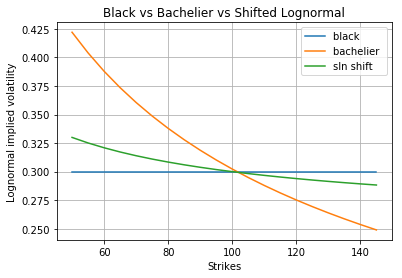

In [8]:
f = 100
t = 2
shift = 30

lower_bound = 50
upper_bound = 150
ks = np.arange(lower_bound, upper_bound, 5)

black_atm_ivol = 0.3
bach_atm_ivol = black_atm_ivol * f

atm_call_price = ba.black_option_price(f, f, t, black_atm_ivol, 1)

#find the shifted lognormal vol for the given shift to calbirate to the ATM call price
sln_atm_ivol = ba.sln_implied_vol(atm_call_price, f, f, t, 1, shift)

#compute the call option prices
black_call = [ba.black_option_price(f, ks[i], t, black_atm_ivol, 1) for i in range(len(ks))]
bach_call = [ba.bachelier_option_price(f, ks[i], t, bach_atm_ivol, 1) for i in range(len(ks))]
sln_call = [ba.sln_option_price(f, ks[i], t, sln_atm_ivol, shift, 1) for i in range(len(ks))]

#compute the implied vol from the 3 models
black_ivol = [ba.black_implied_vol(black_call[i], f, ks[i], t, 1, black_atm_ivol) for i in range(len(ks))]
bach_ivol = [ba.black_implied_vol(bach_call[i], f, ks[i], t, 1, black_atm_ivol) for i in range(len(ks))]
sln_ivol  = [ba.black_implied_vol(sln_call[i], f, ks[i], t, 1, black_atm_ivol) for i in range(len(ks))]

plt1, = plt.plot(ks, black_ivol, label="black ")
plt2, = plt.plot(ks, bach_ivol, label="bachelier ")
plt3, = plt.plot(ks, sln_ivol, label="sln shift")

plt.legend(handles=[plt1, plt2, plt3])

plt.xlabel('Strikes')
plt.ylabel('Lognormal implied volatility')
plt.title('Black vs Bachelier vs Shifted Lognormal')
plt.grid(True)
plt.show()